<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/Lecture/14_TFKeras_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoEncoder 오토인코더

- 오토인코더는 입력과 출력이 동일하다. --> 자기 자신을 재생성하는 네트워크이다.

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/1fdf4275-3694-43e2-a359-14eff2cf86c0" width="57%"><br></br>

- Encoder : 입력쪽, 인코더는 일종의 __특징 추출기__와 같은 역할

- Latent Vector : 잠재변수, 입력 데이터를 대표하는 특성 벡터

	- Encoder를 통과하면서 입력 데이터의 특징이 추출된 결과 벡터이다.
	- latent: 잠재성의, 표면에 나타나지 않는, 숨어 있는

- Decoder : 출력쪽, 디코더는 압축된 데이터를 다시 복원하는 역할

<br></br>

## 예제. MNIST

- TensorFlow 공식 튜토리얼 참고

    - https://www.tensorflow.org/tutorials/generative/autoencoder?hl=ko

    - https://www.tensorflow.org/tutorials/generative/cvae?hl=ko

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_y.shape)

# image RGB값을 0 ~ 1로 Scale
train_X = train_X / 255.0
test_X  = test_X / 255.0

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,)


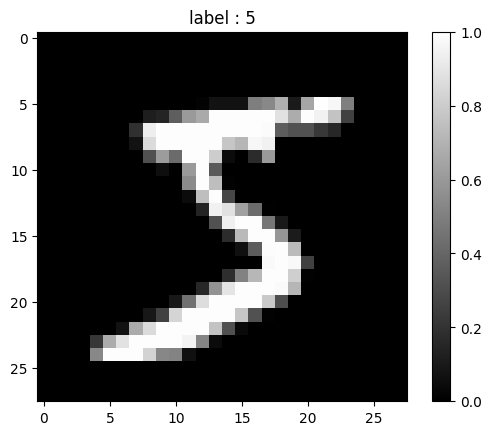

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_X[0].reshape(28,28), cmap='gray')
plt.title("label : " + str(train_y[0]))
plt.colorbar()
plt.show()

</br>

### - AutoEncoder

In [4]:
# 28 x 28 --> 784
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, test_X.shape)

(60000, 784) (10000, 784)


In [5]:
# AutoEncoder Model 생성

model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)), # 입력층, Encoder
    tf.keras.layers.Dense(64, activation='relu'),  # 잠재벡터, Latent Vector
    tf.keras.layers.Dense(784, activation='sigmoid'), # 출력층, Decoder
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716640 (2.73 MB)
Trainable params: 716640 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# autoencoder는 입력된 데이터 자신이 출력되도록 layer를 구성한 것이다.
# 잠재벡터는 입력 데이터를 대표하는 특성 벡터가 된다.

model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 7s 6ms/step - loss: 0.0505
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0173
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0121
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0102
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0091
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0083
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0076
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0072
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0068
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0066


1/1 [==============================] - 0s 17ms/step


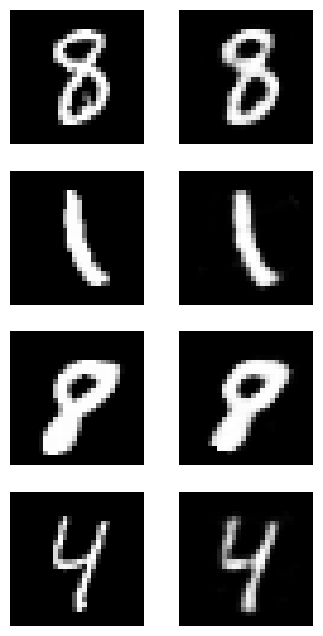

In [7]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4,2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.axis("off")

    plt.subplot(4,2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis("off")

plt.show() #--> 예측 결과가 입력 데이터(자기 자신)을 잘 표현하고 있는 것 같다.

In [8]:
model.evaluate(test_X, test_X)

313/313 [==============================] - 1s 2ms/step - loss: 0.0063


0.006329255644232035

</br>

### - CNN

- CNN 모델을 사용했을 때 입력 데이터 자신을 출력으로 잘 표현하는지 본다.

In [9]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


#### ◾ ReLU

In [10]:
# CNN 모델 활용
# input_shape=(28, 28, 1)
# 첫 번째 Conv2D(2x2 filter)를 통과하고 나면 shape=(14, 14, 32)
# 두 번째 Conv2D(2x2 filter)를 통과하고 나면 shape=(7, 7, 64)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'), #--> latent vector
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)), #--> 두번째 Conv2D(filters=64)와 대칭 구조
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    #--> 첫번째 Conv2D(filters=32)와 대칭 구조
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid'
    ) #--> 입력과 대칭 구조
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                200768    
                                                                 
 dense_4 (Dense)             (None, 3136)              203840    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)       

In [11]:
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 5s 6ms/step - loss: 0.0791
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0308
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0213
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0188
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0176
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0170
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0166
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0162
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0160
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0158
Epoch 11/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0155
Epoch 12/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0151
Epoch 13/20
235/235 [====

1/1 [==============================] - 0s 18ms/step


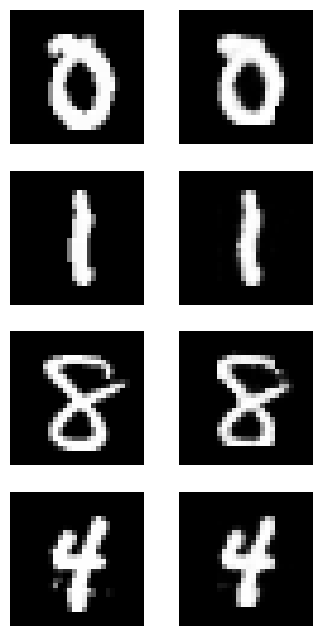

In [12]:
plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4,2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.axis("off")

    plt.subplot(4,2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis("off")

plt.show()

In [13]:
loss, acc = model.evaluate(test_X, test_X)
loss, acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0140


0.014014234766364098

#### ◾ ELU

- ReLU 말고 ELU 활성 함수 사용

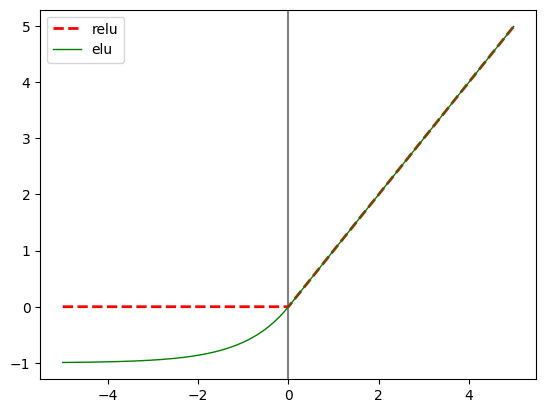

In [14]:
import math

# ELU 그래프 확인
x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z)-1) if z < 0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', lw=2, label='relu')
plt.plot(x, elu, 'g-', lw=1, label='elu')
plt.legend()
plt.show()

In [15]:
# CNN 모델 활성 함수로 ELU 적용

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'), #--> 3번 Layer
    tf.keras.layers.Dense(7*7*64, activation='elu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 3s 6ms/step - loss: 0.0533
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0169
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0105
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0087
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0079
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0075
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0071
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0068
Epoch 9/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0066
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0065
Epoch 11/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0063
Epoch 12/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0062
Epoch 13/20
235/235 [====

1/1 [==============================] - 0s 21ms/step


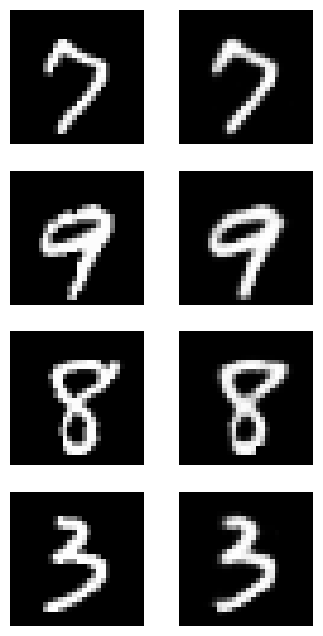

In [16]:
plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4,2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.axis("off")

    plt.subplot(4,2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis("off")

plt.show()
# 출력 데이터가 입력 데이터를 잘 표현할수록
# 784로 표현되는 입력값을 64개의 latent vector로 잘 압축했다고 볼 수 있고,
# 입력 데이터로부터 특성을 잘 추출했다고 볼 수 있다.

In [17]:
loss, acc = model.evaluate(test_X, test_X)
loss, acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0054


0.005444104317575693

<br></br>

### - 잠재변수

- latent vector가 MNIST 이미지 데이터의 특성을 얼마나 잘 반영하고 있는지 군집화를 통해 확인해 본다.

In [18]:
# 잠재변수 벡터 확보
# 이미 훈련이 끝난 ELU 적용 모델에서 latent vector에 해당하는 3번 layer에서 output(벡터값)을 가져온다.

latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

1875/1875 [==============================] - 5s 2ms/step
(60000, 64)
[14.062366   12.992202   11.189871   -0.99999976 -0.9999997  -0.9999978
 11.262837   -0.99998814 22.084398   -0.9999998  -0.9999998  12.763373
 18.358751   15.391584   17.437342    6.668957   -0.99999523 19.955572
 14.037257    6.8214197  17.671114   -0.9999495  17.234058   -0.9999984
  8.824374   -0.99999946 14.101144   14.685891    3.8320696  17.910007
 -0.9999997  -0.9999996  -0.9999996  -0.9999688   7.3139772  11.850276
 14.234087   -0.99999976  9.913521   -0.9999993  -0.9999997  20.144413
 13.217543   11.723215   18.877413   -0.99999857 16.15123    -0.99999857
 13.648523   -0.999998   25.709583   -0.50745875 16.152735    7.794192
 26.406065   11.324622   16.922033   10.576302   -0.5564845   7.631996
 -0.9954067  10.621059   -0.8466622  10.925439  ]


#### ◾ K-Means

- latent vector를 가지고 K-Means 군집화를 수행

In [19]:
from sklearn.cluster import KMeans

In [20]:
%%time

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

CPU times: user 20.5 s, sys: 2.22 s, total: 22.7 s
Wall time: 12.9 s


KMeans(n_clusters=10, n_init=10, random_state=42)

In [21]:
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape) #--> 10개 군집 각각의 64차원 중심 벡터
print(kmeans.cluster_centers_[0]) #--> 첫 번째 군집의 중심 벡터

[4 7 8 ... 4 6 4]
(10, 64)
[15.726039   19.07201    13.057141   -0.9999943  -0.9999974  -0.9999941
  9.264131   -0.9999248  20.05617    -0.9999984  -0.9999997  10.695733
 12.251389   15.975929   12.671693   10.756971   -0.99998975  8.683452
 12.789423    2.925897   12.901339   -0.9961448  13.087611   -0.9999064
 15.555925   -0.99999547  9.886152   14.894236   12.631321   12.021499
 -0.9999897  -0.9999961  -0.9999966  -0.9997205  12.947434    9.726034
 25.54562    -0.9999875  17.824203   -0.9999849  -0.9999966  10.911776
 15.991561   13.733089    8.987253   -0.9999907  11.736989   -0.9999896
 16.254139   -0.9999914  13.476886    3.7244956  11.4980755  15.917135
 12.376978   18.685995   12.75297     5.2088327  11.767508   11.548297
 -0.9694978  14.032467   25.527565   13.188359  ]


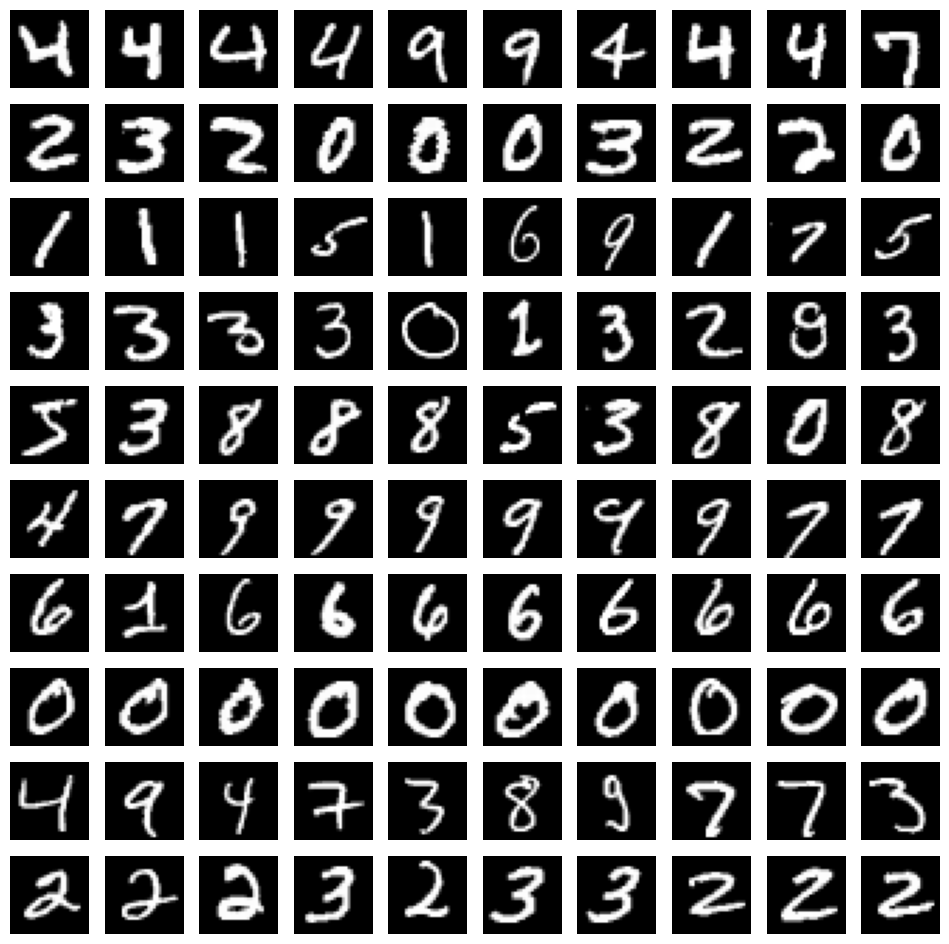

In [22]:
# 시각화 : 한 행(10 samples)이 하나의 군집을 의미한다.

plt.figure(figsize=(12,12))
for i in range(10): # k-means clusters 10개
    images = train_X[kmeans.labels_ == i]
    for c in range(10): # 각 clusters의 sample 10개
        plt.subplot(10, 10, i*10+c+1)
        plt.imshow(images[c].reshape(28,28), cmap='gray')
        plt.axis('off')

plt.show()
# 748개의 features를 64개의 특성으로 차원을 줄여 clustering한 결과
# 숫자의 군집화는 잘 이루어지지 않은 것 같아 보인다.
# 그런데 군집별로 글씨체가 유사해 보이기도 한다.

#### ◾ t-SNE

- t Stochastic Nearest Neghbor

    - stochastic: 확률(론)적인, 추측 통계학적인(추계학의)

- 고차원의 벡터를 저차원으로 옮겨서 시각화에 도움을 주는 방법이다.

- 실제 차원을 줄이는 것이 아니다.

    원 데이터의 차원은 그대로 두고 시각화를 위해 2차원과 같은 저차원으로 특성을 옮기는 것

- k-Means가 각 클러스터를 계산하기 위한 단위로 중심과 각 데이터의 거리를 측정한다면,

- t-SNE는 각 데이터의 유사도를 정의하고 원래 공간에서의 유사도와 저차원 공간에서의 유사도가 비슷해지도록 학습시킨다.

- 여기서 유사도는 수학적으로 확률로 표현된다.

In [23]:
from sklearn.manifold import TSNE

In [24]:
%%time

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

CPU times: user 57.6 s, sys: 240 ms, total: 57.9 s
Wall time: 32.8 s


In [25]:
print(tsne_vector.shape)
print(tsne_vector[0])

(5000, 2)
[-10.134276 -34.92946 ]


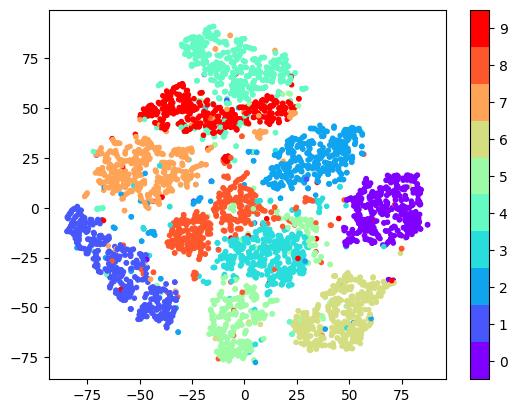

In [26]:
# 결과 시각화

n_clusters = 10
cmap = plt.get_cmap('rainbow', n_clusters)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(n_clusters))
tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters-1) / n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(n_clusters))

plt.show()

#### ◾ kNN

- 최근접이웃의 숫자 perplexities 튜닝

- perplexity: 당혹, 곤혹, 혼란, 뒤얽힌 상황, 난국 --> 흩어짐

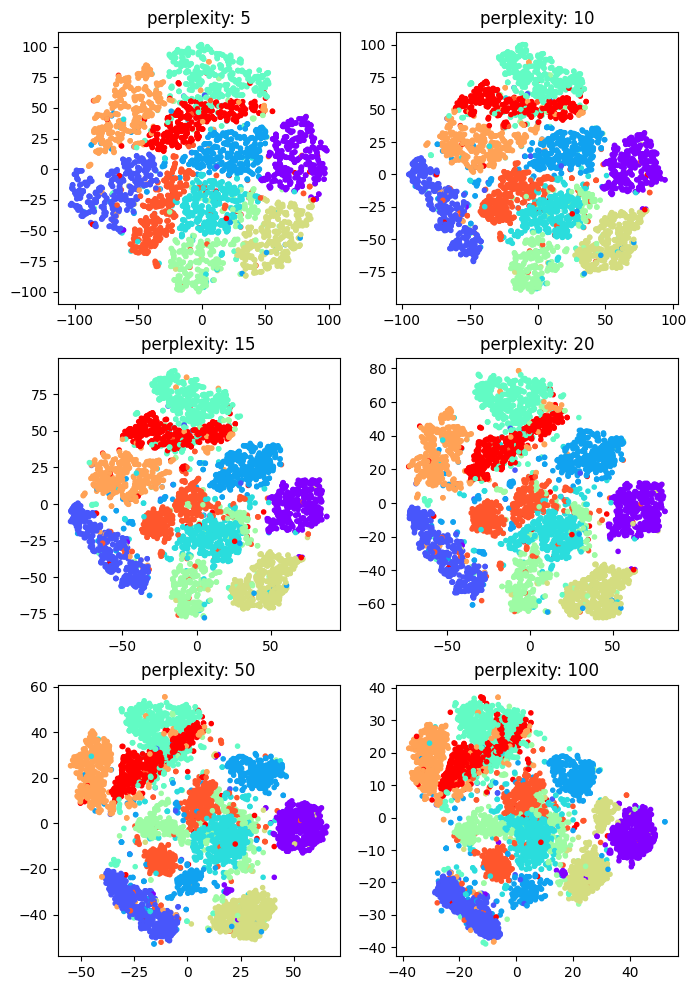

CPU times: user 6min 54s, sys: 1.64 s, total: 6min 56s
Wall time: 4min 2s


In [27]:
%%time

perplexities = [5, 10, 15, 20, 50, 100]

plt.figure(figsize=(10,15))
for c in range(6):
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
    tsne_vector = tsne.fit_transform(latent_vector[:5000])

    plt.subplot(3,2, c+1)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_y[:5000], cmap='rainbow')
    plt.title("perplexity: {0}".format(perplexities[c]))

plt.show()

In [28]:
# 약간의 뎁스를 더 가져간 사각화

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

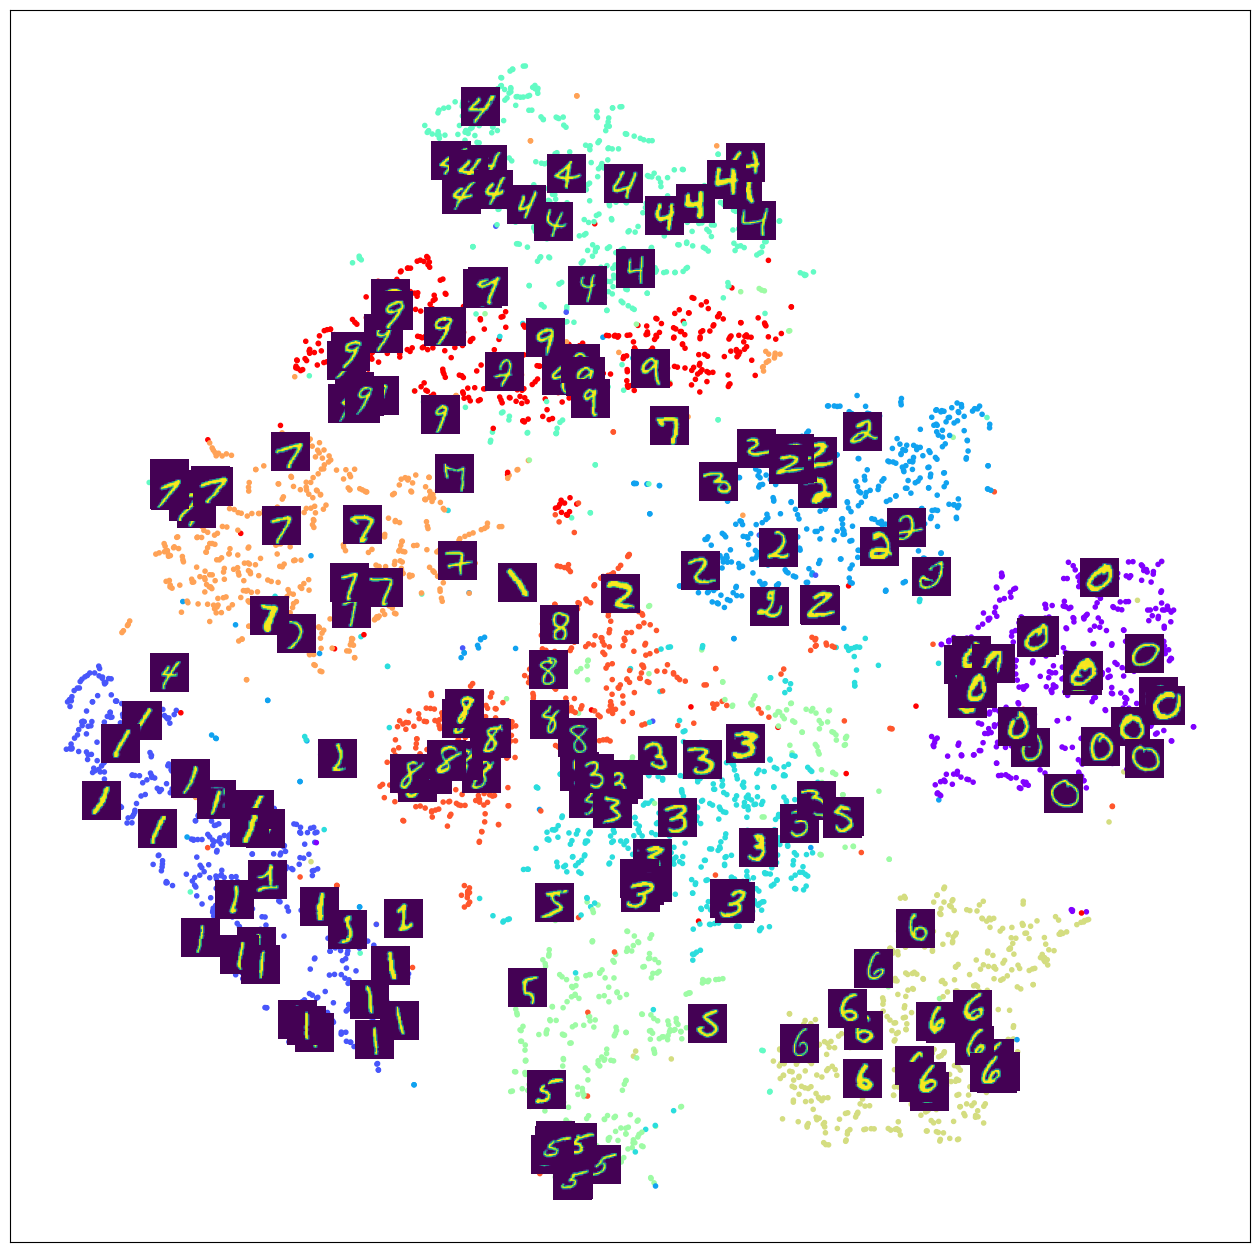

In [30]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize=(16,16))
ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_y[:5000], cmap='rainbow')
for i in range(200):
    imagebox = OffsetImage(train_X[i].reshape(28,28))
    ab = AnnotationBbox(imagebox, (tsne_vector[i,0], tsne_vector[i,1]), frameon=False, pad=0.0)
    ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()